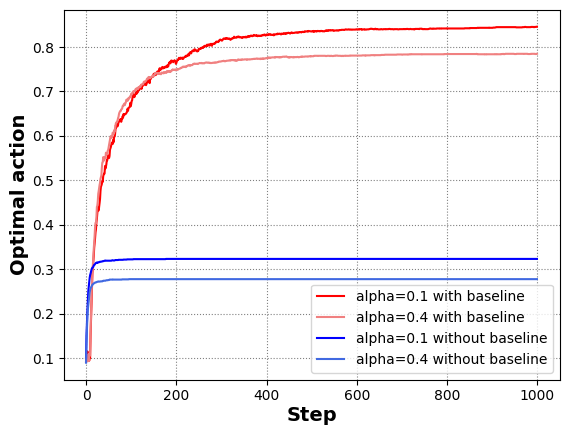

In [1]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

step = 1000
runs = 2000
sigma = 1  # 10-armed testbed 的正态分布标准差
miu_lst = [0.2, -0.85, 1.55, 0.3, 1.2, -1.5, -0.2, -1.0, 0.9, -0.6]  # 10-armed testbed 的正态分布均值列表
threshold = 100
best_action_index = miu_lst.index(max(miu_lst))


def action_reward(action):  # 10-armed 赌博机testbed，输入动作序号，输出对应的奖励值
    reward = miu_lst[action]+np.random.normal(0, scale=sigma)
    return reward


def random_index(rate):  # 输入概率列表，按照列表的概率输出对应动作的索引
    # """随机变量的概率函数"""
    # 参数rate为list<int>
    # 返回概率动作的下标索引
    for i in range(0, len(rate)):
        rate[i] = int(1000*rate[i])
    start = 0
    index = 0
    randnum = random.randint(1, sum(rate))
    for index, scope in enumerate(rate):
        start += scope
        if randnum <= start:
            break
    return index


def max_index(lst):  # 寻找列表中最大值的索引，如果有多个，则随机输出一个索引
    index_lst = []
    max_n = max(lst)
    for i in range(len(lst)):
        if lst[i] == max_n:
            index_lst.append(i)
    max_index = random.sample(index_lst, 1)[0]
    return max_index


def Gradient_Bandit(alpha, step, runs):  # 引入了所谓偏好 preference
    action_runs_lst = [[] for k in range(runs)]  # 二维列表，存放所有runs的所有step的最佳动作判断变量，1是正确动作，0不是最佳动作
    action_runs_lst_average = [0 for j in range(step)]  # 一维列表，将 action_runs_lst 中的所有runs的对应step的action求平均

    for run_times in range(0, runs):
        Q = [4 for i in range(10)]  # 奖励均值(是用来做greed决策的，而不是最终图里面展示的average reward)，这里使用了积极的初始值设定，Q=+4
        N = [0 for j in range(10)]  # 计数列表
        H = [0 for k in range(10)]  # 偏好列表，在此基础上可以得到P
        H_e = [0 for l in range(10)]  # 经过乘方处理之后的偏好列表，在此基础上可以得到P
        P = [0 for m in range(10)]  # 概率列表
        k = 1
        while k <= step:
            sum_best_action = 0
            if sum(H) == 0:
                action_id = random.choice([i for i in range(10)])
            else:
                for i in range(0, len(H_e)):
                    H_e[i] = 2.71828 ** H[i]
                for i in range(0, len(P)):
                    P[i] = H_e[i]/sum(H_e)

                action_id = max_index(P)  # 得到在概率列表P下的动作序号
            if action_id == best_action_index:
                sum_best_action += 1
            action_runs_lst[run_times].append(sum_best_action)

            N[action_id] = N[action_id] + 1
            act_reward = action_reward(action_id)  # 这一次奖励的数值（用于图像展示）
            Q[action_id] = Q[action_id] + (1/N[action_id])*(act_reward - Q[action_id])  # 增量式计算平均值

            for i in range(0, len(H)):
                if i == action_id:
                    H[i] = H[i] + alpha * (act_reward - Q[i])*(1-P[i])  # 更新偏好的H列表
                    if H[i] > threshold:
                        H[i] = threshold
                    if H[i] < -threshold:
                        H[i] = -threshold
                else:
                    H[i] = H[i] - alpha * (act_reward - Q[i]) * P[i]
                    if H[i] > threshold:
                        H[i] = threshold
                    if H[i] < -threshold:
                        H[i] = -threshold
            k += 1

    for i in range(0, step):
        for j in range(0, runs):
            action_runs_lst_average[i] = action_runs_lst_average[i] + action_runs_lst[j][i]
        action_runs_lst_average[i] = action_runs_lst_average[i] / runs
        # print(action_runs_lst_average)
    return action_runs_lst_average


def Gradient_Bandit_withoutbase(alpha, step, runs):  # 引入了所谓偏好 preference
    action_runs_lst = [[] for k in range(runs)]  # 二维列表，存放所有runs的所有step的最佳动作判断变量，1是正确动作，0不是最佳动作
    action_runs_lst_average = [0 for j in range(step)]  # 一维列表，将 action_runs_lst 中的所有runs的对应step的action求平均

    for run_times in range(0, runs):
        Q = [4 for i in range(10)]  # 奖励均值(是用来做greed决策的，而不是最终图里面展示的average reward)，这里使用了积极的初始值设定，Q=+4
        N = [0 for j in range(10)]  # 计数列表
        H = [0 for k in range(10)]  # 偏好列表，在此基础上可以得到P
        H_e = [0 for l in range(10)]  # 经过乘方处理之后的偏好列表，在此基础上可以得到P
        P = [0 for m in range(10)]  # 概率列表
        k = 1
        while k <= step:
            sum_best_action = 0
            if sum(H) == 0:
                action_id = random.choice([i for i in range(10)])
            else:
                for i in range(0, len(H_e)):
                    H_e[i] = 2.71828 ** H[i]
                for i in range(0, len(P)):
                    P[i] = H_e[i] / sum(H_e)

                action_id = max_index(P)  # 得到在概率列表P下的动作序号
            if action_id == best_action_index:
                sum_best_action += 1
            action_runs_lst[run_times].append(sum_best_action)

            N[action_id] = N[action_id] + 1
            act_reward = action_reward(action_id)  # 这一次奖励的数值（用于图像展示）
            Q[action_id] = Q[action_id] + (1 / N[action_id]) * (act_reward - Q[action_id])  # 增量式计算平均值

            for i in range(0, len(H)):
                if i == action_id:
                    H[i] = H[i] + alpha * act_reward * (1 - P[i])  # 更新偏好的H列表
                    if H[i] > threshold:
                        H[i] = threshold
                    if H[i] < -threshold:
                        H[i] = -threshold
                else:
                    H[i] = H[i] - alpha * act_reward * P[i]
                    if H[i] > threshold:
                        H[i] = threshold
                    if H[i] < -threshold:
                        H[i] = -threshold
            k += 1

    for i in range(0, step):
        for j in range(0, runs):
            action_runs_lst_average[i] = action_runs_lst_average[i] + action_runs_lst[j][i]
        action_runs_lst_average[i] = action_runs_lst_average[i] / runs
        # print(action_runs_lst_average)
    return action_runs_lst_average


_010_GB_ = Gradient_Bandit(0.1, step, runs)
_040_GB_ = Gradient_Bandit(0.4, step, runs)

_010_GB_withoutbase = Gradient_Bandit_withoutbase(0.1, step, runs)
_040_GB_withoutbase = Gradient_Bandit_withoutbase(0.4, step, runs)

x = np.arange(step)
plt.plot(x, _010_GB_, color='red')
plt.plot(x, _040_GB_, color='lightcoral')
plt.plot(x, _010_GB_withoutbase, color='blue')
plt.plot(x, _040_GB_withoutbase, color='royalblue')

plt.legend(["alpha=0.1 with baseline", "alpha=0.4 with baseline", "alpha=0.1 without baseline", "alpha=0.4 without baseline"])
plt.grid(color='gray', linestyle=':')
plt.xlabel("Step", fontweight='bold', fontsize=14, labelpad=2)
plt.ylabel('Optimal action', fontweight='bold', fontsize=14, labelpad=2)
plt.show()